In [0]:
# !wget -qO - https://www.mongodb.org/static/pgp/server-4.2.asc | sudo apt-key add -
# !echo "deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu bionic/mongodb-org/4.2 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-4.2.list
# !sudo apt-get update
# !sudo apt-get install -y mongodb-org

In [0]:
!pip install pymongo
!apt install mongodb
!service mongodb start

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpcap0.8 libstemmer0d libyaml-cpp0.5v5 mongo-tools mongodb-clients
  mongodb-server mongodb-server-core
The following NEW packages will be installed:
  libpcap0.8 libstemmer0d libyaml-cpp0.5v5 mongo-tools mongodb mongodb-clients
  mongodb-server mongodb-server-core
0 upgraded, 8 newly installed, 0 to remove and 31 not upgraded.
Need to get 53.1 MB of archives.
After this operation, 215 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpcap0.8 amd64 1.8.1-6ubuntu1.18.04.1 [118 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libstemmer0d amd64 0+svn585-1build1 [62.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libyaml-cpp0.5v5 amd64 0.5.2-4ubuntu1 [150 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mongo-tools amd64 3.6.3-0ubunt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import json
import datetime
import time, os
import re

import pandas as pd
import numpy as np

import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

from pymongo import MongoClient

from tqdm.notebook import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [0]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords 
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import gensim

In [0]:
google_vec_file = 'drive/My Drive/GoogleNews-vectors-negative300.bin.gz'
model = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
model.most_similar('s' ,topn=8)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Martinâ_€_™', 0.5794286727905273),
 ('€_™_s', 0.5770620703697205),
 ('™_s', 0.562404215335846),
 ('managementâ_€_™', 0.5574976205825806),
 ('sâ_€', 0.5574907064437866),
 ('otherâ_€_™', 0.5377866625785828),
 ('governorâ_€_™', 0.5338437557220459),
 ('everyoneâ_€_™', 0.5317774415016174)]

In [0]:
client = MongoClient()
!mongorestore -d tv 'drive/My Drive/Metis-Project-4/dump/tv'

2020-05-17T14:19:03.133+0000	the --db and --collection args should only be used when restoring from a BSON file. Other uses are deprecated and will not exist in the future; use --nsInclude instead
2020-05-17T14:19:03.568+0000	building a list of collections to restore from drive/My Drive/Metis-Project-4/dump/tv dir
2020-05-17T14:19:03.813+0000	reading metadata for tv.posts from drive/My Drive/Metis-Project-4/dump/tv/posts.metadata.json
2020-05-17T14:19:03.815+0000	reading metadata for tv.tv from drive/My Drive/Metis-Project-4/dump/tv/tv.metadata.json
2020-05-17T14:19:04.094+0000	restoring tv.tv from drive/My Drive/Metis-Project-4/dump/tv/tv.bson
2020-05-17T14:19:04.116+0000	restoring tv.posts from drive/My Drive/Metis-Project-4/dump/tv/posts.bson
2020-05-17T14:19:04.257+0000	no indexes to restore
2020-05-17T14:19:04.257+0000	finished restoring tv.tv (234 documents)
2020-05-17T14:19:05.342+0000	no indexes to restore
2020-05-17T14:19:05.342+0000	finished restoring tv.posts (22974 document

In [0]:
db = client.tv
client.list_database_names()
list(db.tv.find({'subreddit': 'westworld'} ,{'_id':0, 'name':1 , 'episode_number': 1, 'tomato':1})) # ,{'_id':0, 'name':1 , 'episode_number': 1}

[{'episode_number': 1, 'name': 'The Original', 'tomato': '100%'},
 {'episode_number': 2, 'name': 'Chestnut', 'tomato': '96%'},
 {'episode_number': 3, 'name': 'The Stray', 'tomato': '90%'},
 {'episode_number': 4, 'name': 'Dissonance Theory', 'tomato': '96%'},
 {'episode_number': 5, 'name': 'Contrapasso', 'tomato': '93%'},
 {'episode_number': 6, 'name': 'The Adversary', 'tomato': '89%'},
 {'episode_number': 7, 'name': "Trompe L'Oeil", 'tomato': '96%'},
 {'episode_number': 8, 'name': 'Trace Decay', 'tomato': '95%'},
 {'episode_number': 9, 'name': 'The Well-Tempered Clavier', 'tomato': '86%'},
 {'episode_number': 10, 'name': 'The Bicameral Mind', 'tomato': '94%'},
 {'episode_number': 1, 'name': 'Journey Into Night', 'tomato': '87%'},
 {'episode_number': 2, 'name': 'Reunion', 'tomato': '95%'},
 {'episode_number': 3, 'name': 'Virtù e Fortuna', 'tomato': '100%'},
 {'episode_number': 4, 'name': 'The Riddle of the Sphinx', 'tomato': '95%'},
 {'episode_number': 5, 'name': 'Akane No Mai', 'tomato

In [0]:
def cleaning(string):  
    string = re.sub('http\S*', ' ', string)
    string = string.replace('[deleted]', '')
    string = string.replace('[Nsfw]', '')
    string = string.replace('[removed]', '')
    string = re.sub('\[.*?\]\(\#s', ' ', string)
    string = re.sub('\/u\/\S*', ' ', string)
    string = string.replace('\n', ' ')
    string = re.sub('\S*\d\S*', ' ', string)
    string = string.lower().strip()
    string = re.sub('[^a-z\s]', ' ', string)
    string = re.sub('\s{2,}', ' ', string)
    string = string.replace(' s ', ' ')
    string = string.replace(' t ', ' ')
    return string

In [0]:
corpus = []
corpus_raw = []
posts_json = list(db.posts.find({'subreddit': 'westworld'},{'_id' : 0, 'title':1, 'selftext' : 1, 'episode.name' : 1, 'episode.tomato' : 1,'episode.season_number' : 1,'episode.episode_number' : 1}))
for post in posts_json:
    corpus.append(cleaning( post['title'] + ' ' + post['selftext'] ))
    corpus_raw.append( post['title'] + ' ' + post['selftext'] )

In [0]:
doc_ep_info = pd.DataFrame( [posts['episode'] for posts in posts_json] )
doc_ep_info['name'].unique()

array(['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory',
       'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay',
       'The Well-Tempered Clavier', 'The Bicameral Mind',
       'Journey Into Night', 'Reunion', 'Virtù e Fortuna',
       'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space',
       'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger',
       'Parce Domine', 'The Winter Line', 'The Absence of Field',
       'The Mother of Exiles', 'Genre', 'Decoherence', 'Passed Pawn',
       'Crisis Theory'], dtype=object)

In [0]:
# stop_words = set(stopwords.words('english')) 
stop_words = set(CountVectorizer(stop_words='english').get_stop_words())
stop_words.add('s')
stop_words.add('t')
def stop_and_stem(doc):
    return [WordNetLemmatizer().lemmatize(w) for w in doc if not w in stop_words]

def tokenizer(doc):
    # TreebankWordTokenizer
    tokens = TreebankWordTokenizer().tokenize(doc)
    return stop_and_stem( tokens )

analyzer = CountVectorizer(tokenizer=tokenizer,ngram_range=(1,1)).build_analyzer()
def stemmed_words(doc):
    # WordNetLemmatizer().lemmatize
    # PorterStemmer().stem
    return [WordNetLemmatizer.lemmatize(w) for w in analyzer(doc) if not w.split in stop_words]

In [0]:
vectorizer = CountVectorizer(tokenizer=tokenizer,
                                   preprocessor=None,
                                   min_df = 3, #.004,
                                   max_df = 0.7,
                                   ngram_range=(1,1),
#                                  analyzer=stemmed_words
                                  )
tfidf = TfidfTransformer()
doc_word = pd.DataFrame.sparse.from_spmatrix(vectorizer.fit_transform(corpus),columns=vectorizer.get_feature_names())
df_combined_doc = pd.concat([doc_ep_info.add_prefix('doc_ep_info_')['doc_ep_info_name'], doc_word], axis = 1).groupby("doc_ep_info_name").sum()
df_combined_doc = tfidf.fit_transform(df_combined_doc)
doc_word = tfidf.transform(doc_word)

In [0]:
doc_vec = [[] for doc in range(doc_word.shape[0])]
coo = doc_word.tocoo()
wrd_list = vectorizer.get_feature_names()
for _doc, _word, _tfidf in zip(coo.row, coo.col, coo.data):
  try:
    doc_vec[_doc].append(model.get_vector(wrd_list[_word]) * _tfidf )
  except:
    pass
doc_vec = np.vstack([ np.zeros(300) if len(doc) == 0 else np.array(doc).mean( axis = 0 ) for doc in doc_vec ])

In [0]:
# doc_vec = []
# for doc in corpus:
#   word_vec = []
#   for word in doc.split(' '):
#     try:
#       word_vec.append(model.get_vector(word))
#     except:
#       pass
#   doc_vec.append( np.array(word_vec).mean( axis = 0 ) )
# doc_vec = np.vstack([ np.zeros(doc_vec[0].shape) if vec.shape != doc_vec[0].shape else vec for vec in doc_vec ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


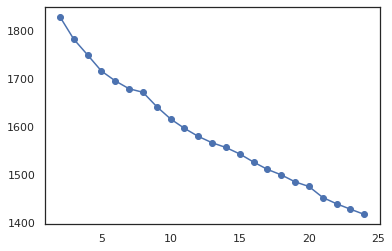

In [0]:
interia = [None,None]
for k in tqdm(range(2,25,1)):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(doc_vec)
    interia.append(km.inertia_)
plt.plot(interia, marker = 'o')

(array([  49.,  956., 1693.,   51.,   51.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

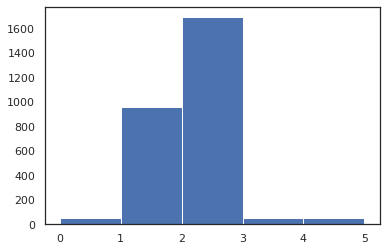

In [0]:
k = 5
km = KMeans(n_clusters=k,random_state=42)
doc_vec_cluster = km.fit_predict(doc_vec)
plt.hist(doc_vec_cluster,bins=range(k+1))

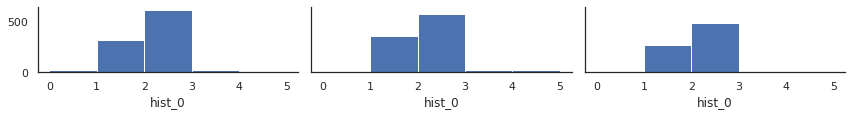

In [0]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(pd.concat([pd.DataFrame(doc_vec_cluster).add_prefix('hist_'), doc_ep_info], axis = 1),
                  col = 'season_number', aspect=2, height=2, palette=pal) # row='episode_number', hue='episode_number'
g.map(plt.hist, 'hist_0', bins = range(k+1))
# g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

(array([1225., 1553.,   22.]),
 array([-1,  0,  1,  2]),
 <a list of 3 Patch objects>)

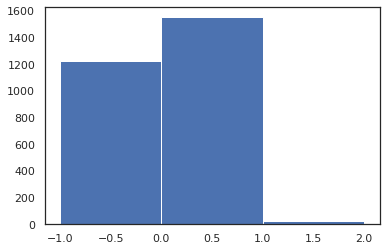

In [0]:
dbscan = DBSCAN(eps = .4, min_samples = 5)
doc_vec_cluster = dbscan.fit_predict(doc_vec)
# doc_vec_cluster=doc_topic_cluster[doc_vec_cluster!=-1]
plt.hist(doc_vec_cluster,bins=np.unique(doc_vec_cluster))

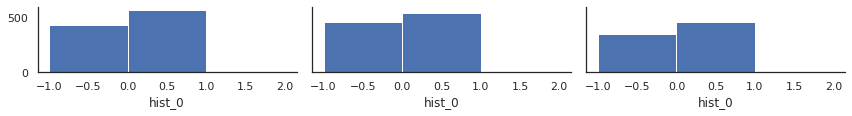

In [0]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(pd.concat([pd.DataFrame(doc_vec_cluster).add_prefix('hist_'), doc_ep_info], axis = 1),
                  col = 'season_number', aspect=2, height=2, palette=pal) # row='episode_number', hue='episode_number'
g.map(plt.hist, 'hist_0', bins = np.unique(doc_vec_cluster))
# g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

In [0]:
# import tensorflow as tf
# from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers

Using TensorFlow backend.


In [0]:
tomato_rating = pd.to_numeric(doc_ep_info['tomato'].str.replace('%',''))

In [0]:
inputs = Input(shape=(300,))
x = Dense(100, activation='relu')(inputs)
x = Dense(50, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(1)(x)
model_tomato = Model(inputs=inputs, outputs=x)

opt = Adam(learning_rate=0.01)
model_tomato.compile(optimizer='Adam',loss='mean_squared_error',metrics=['mean_absolute_error'])
history = model_tomato.fit(doc_vec,tomato_rating,epochs=10,validation_split=0.2)

Train on 2240 samples, validate on 560 samples
Epoch 1/10
2240/2240 [==============================] - 1s 230us/step - loss: 6927.7802 - mean_absolute_error: 82.3140 - val_loss: 1238.2794 - val_mean_absolute_error: 30.8920
Epoch 2/10
2240/2240 [==============================] - 0s 74us/step - loss: 485.2526 - mean_absolute_error: 15.8464 - val_loss: 774.8395 - val_mean_absolute_error: 22.4446
Epoch 3/10
2240/2240 [==============================] - 0s 70us/step - loss: 125.7542 - mean_absolute_error: 7.7720 - val_loss: 776.8566 - val_mean_absolute_error: 22.6809
Epoch 4/10
2240/2240 [==============================] - 0s 63us/step - loss: 92.4570 - mean_absolute_error: 6.4099 - val_loss: 767.6992 - val_mean_absolute_error: 22.5980
Epoch 5/10
2240/2240 [==============================] - 0s 65us/step - loss: 79.2808 - mean_absolute_error: 5.8764 - val_loss: 669.1917 - val_mean_absolute_error: 20.7870
Epoch 6/10
2240/2240 [==============================] - 0s 62us/step - loss: 74.2538 - mea